In [ ]:
### 0. Data Preprocessing 

In [40]:
import pandas as pd
import codecs
with codecs.open('/Users/changyin/Downloads/USvideos.csv', 'r', 'utf-8', errors='replace') as file:
    US_videos = pd.read_csv(file)

In [41]:
US_videos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


# Histograms and Heat Map

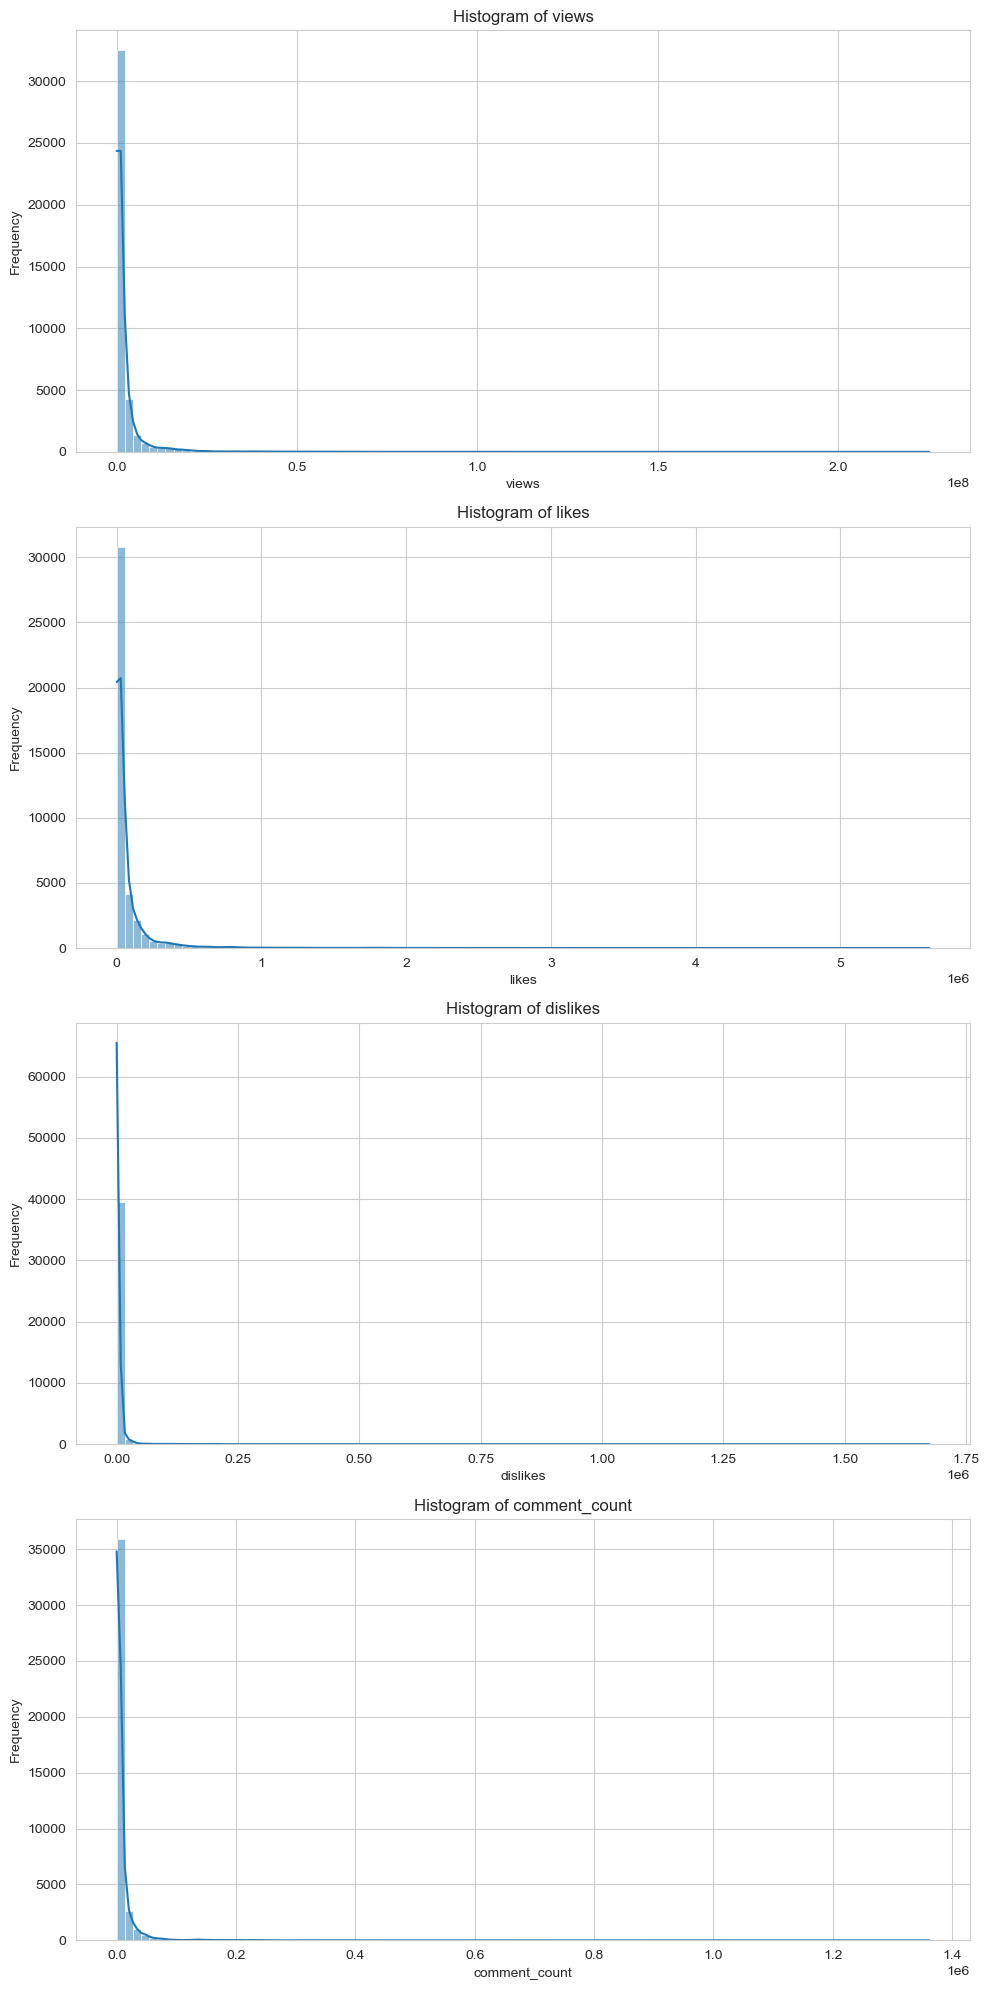

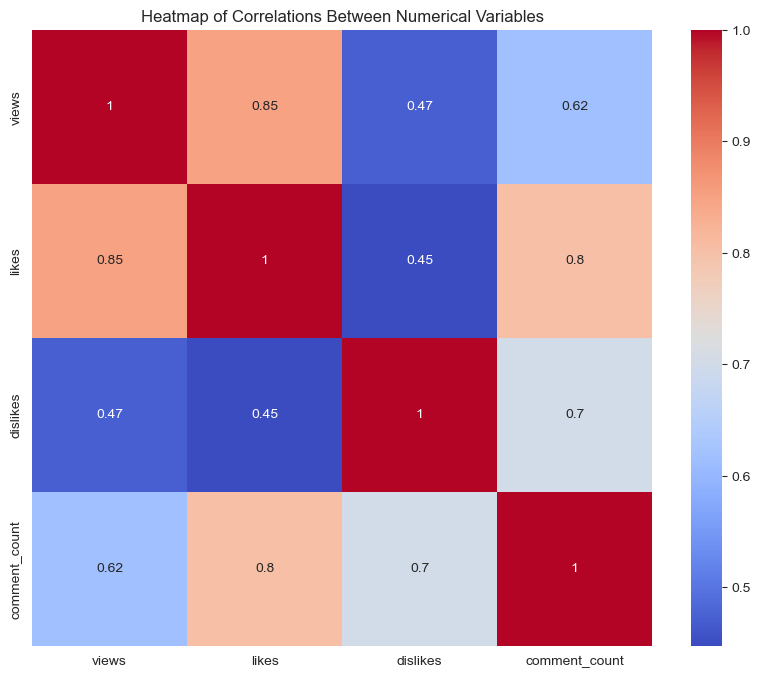

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# List of columns to create histograms for
columns_to_plot = ['views', 'likes', 'dislikes', 'comment_count']

fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, 20))

# Loop through the columns and create a histogram with more bins for each
for i, column in enumerate(columns_to_plot):
    sns.histplot(US_videos[column], ax=axes[i], bins=100, kde=True)  # Increased number of bins for finer x-axis range
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Next step: Create a heatmap to visualize correlations
# Selecting only the numeric columns for the correlation matrix
numeric_columns = US_videos[['views', 'likes', 'dislikes', 'comment_count']]
correlation_matrix = numeric_columns.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap of Correlations Between Numerical Variables")
plt.show()


# Descriptive Stats

In [43]:
descriptive_stats = US_videos[['views', 'likes', 'dislikes', 'comment_count']].describe()
descriptive_stats

,views,likes,dislikes,comment_count
count,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


# Removing rows with duplicates

In [44]:
# Removing rows with duplicates
US_videos= US_videos.drop_duplicates()
US_videos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


# Transformations

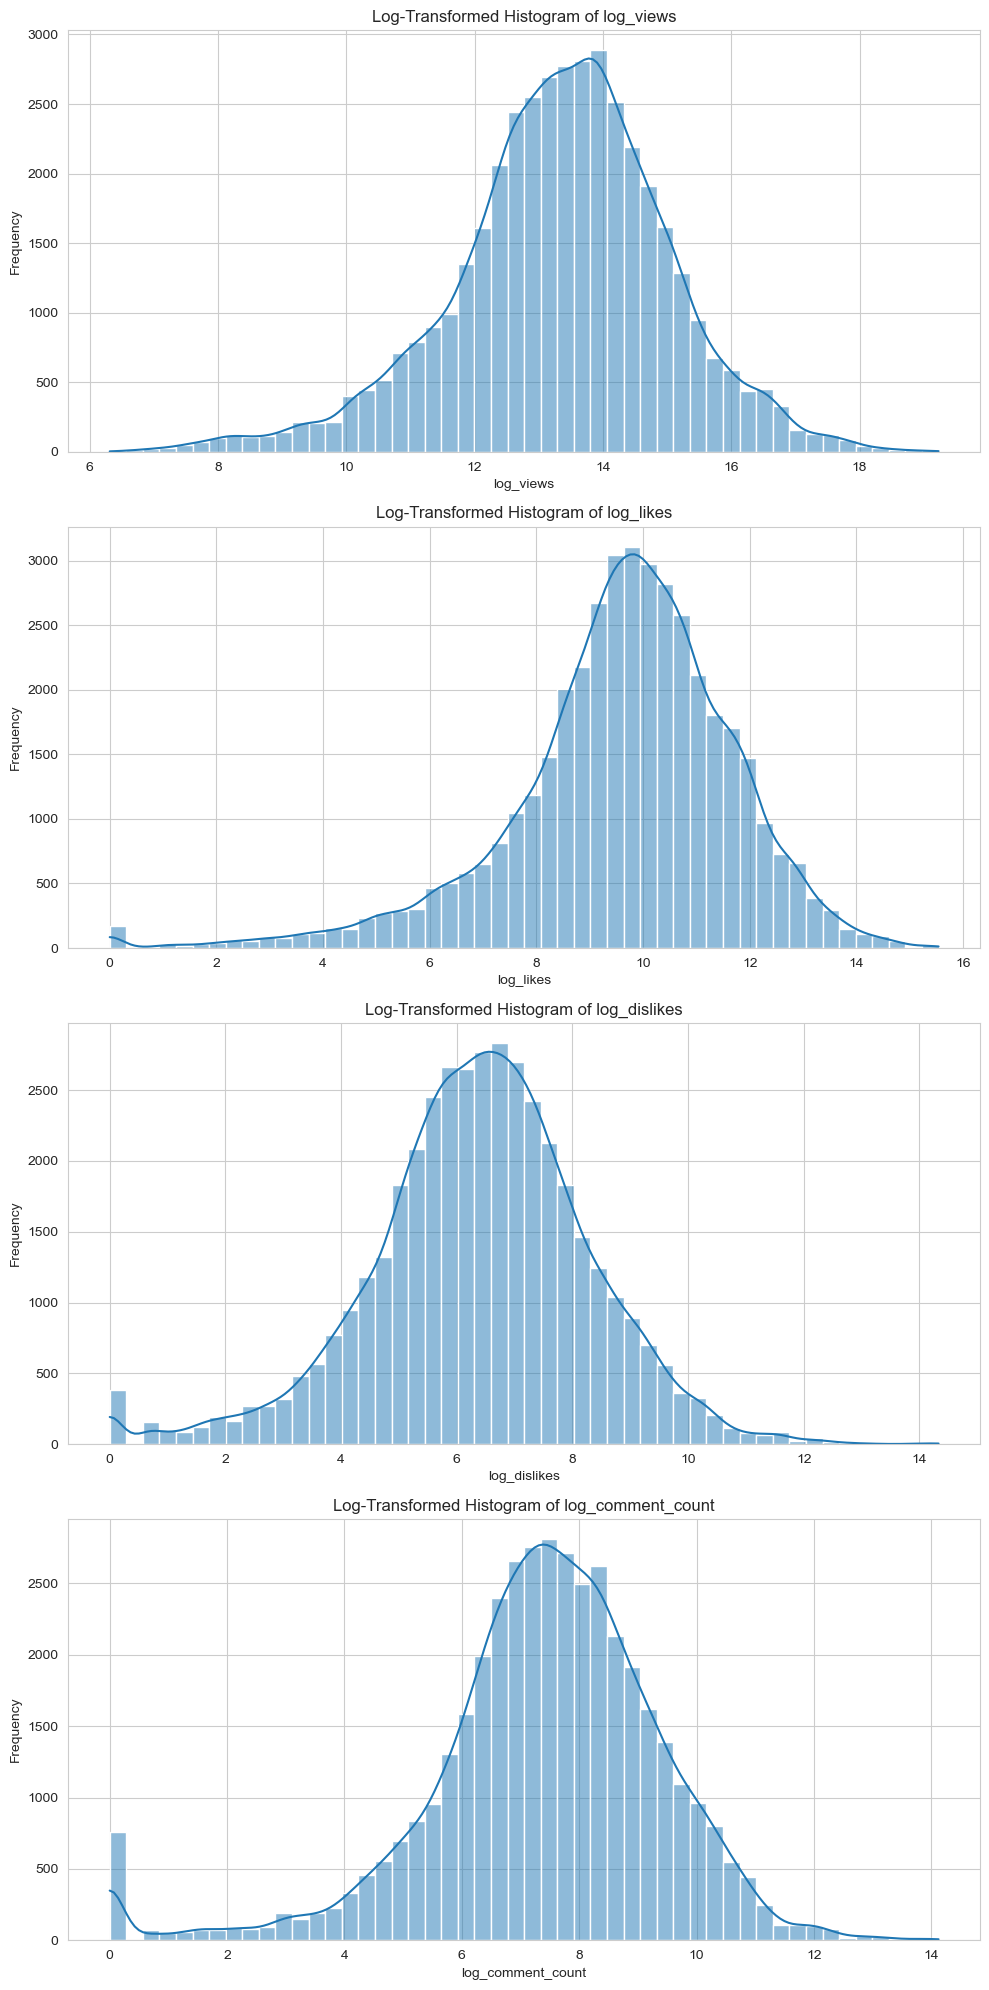

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


US_videos = US_videos.copy()

# Now perform the log transformation
US_videos['log_views'] = np.log1p(US_videos['views'])
US_videos['log_likes'] = np.log1p(US_videos['likes'])
US_videos['log_dislikes'] = np.log1p(US_videos['dislikes'])
US_videos['log_comment_count'] = np.log1p(US_videos['comment_count'])

log_columns = ['log_views', 'log_likes', 'log_dislikes', 'log_comment_count']

# Creating histograms for log-transformed variables
fig, axes = plt.subplots(len(log_columns), 1, figsize=(10, 20))

# Looping through the log-transformed columns and creating a histogram for each
for i, column in enumerate(log_columns):
    sns.histplot(US_videos[column], ax=axes[i], bins=50, kde=True)
    axes[i].set_title(f'Log-Transformed Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Linear Regression model 

In [46]:
import statsmodels.api as sm

# Preparing the data for the regression model with log-transformed variables
X_log = US_videos[['log_likes','log_dislikes','log_comment_count']]
y_log = US_videos['log_views']

# Adding a constant to the independent variables for statsmodels
X_log_sm = sm.add_constant(X_log)

# Building the OLS model with log-transformed variables
model_log = sm.OLS(y_log, X_log_sm).fit()

# Summary of the model with log-transformed variables
model_log_summary = model_log.summary()
model_log_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_views   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                 5.449e+04
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:56:38   Log-Likelihood:                -47085.
No. Observations:               40901   AIC:                         9.418e+04
Df Residuals:                   40897   BIC:                         9.421e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.0716      0.018    396.457      0.000       7.037       7.107
log_likes             0.3725      0.004     97.964      0.000       0.365       0.380
log_dislikes          0.4297      0.004    114.352      0.000       0.422       0.437
log_comment_count    -0.0073      0.004     -2.051      0.040      -0.014      -0.000
==============================================================================
Omnibus:                    29456.523   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1333941.205
Skew:                           2.972   Prob(JB):                         0.00
Kurtosis:                      30.339   Cond. No.                         67.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# Predicting log-transformed views using the OLS model
predicted_log_views_ols = model_log.predict(X_log_sm)

# Calculating residuals (difference between actual and predicted log-transformed views)
residuals_log_ols = y_log - predicted_log_views_ols

# Calculating the Root Mean Squared Error (RMSE)
rmse_log_ols = np.sqrt(np.mean(residuals_log_ols**2))


0.7651004415433494

In [ ]:
#RMSE

In [48]:
rmse_log_ols

0.7651004415433494

In [ ]:
# Plotting Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(predicted_log_views_ols, y_log, alpha=0.5)
plt.plot([y_log.min(), y_log.max()], [y_log.min(), y_log.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Predicted Log-Transformed Views')
plt.ylabel('Actual Log-Transformed Views')
plt.title('Actual vs. Predicted Log-Transformed Views')
plt.show()

# Plotting Residuals
plt.figure(figsize=(10, 6))
plt.scatter(predicted_log_views_ols, residuals_log_ols, alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Log-Transformed Views')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.show()


# Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Preparing the data for the Random Forest model
X_rf = US_videos[['log_likes', 'log_dislikes', 'log_comment_count']]
y_rf = US_videos['log_views']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)

# Building the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting log-transformed views on the test set
predicted_log_views_rf = rf_model.predict(X_test)

# Calculating the Root Mean Squared Error (RMSE) for the model
rmse_rf = mean_squared_error(y_test, predicted_log_views_rf, squared=False)

# Getting the feature importances
feature_importances = rf_model.feature_importances_

# Feature names
features = X_rf.columns

# Creating a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

feature_importances_df


,Feature,Importance
0,log_likes,0.450734
1,log_dislikes,0.494497
2,log_comment_count,0.054769


In [51]:
rmse_rf

0.5545373503492391

# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeRegressor

# Building the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predicting log-transformed views using the Decision Tree model
predicted_log_views_dt = dt_model.predict(X_test)

# Calculating the Root Mean Squared Error (RMSE) for the Decision Tree model
rmse_dt = mean_squared_error(y_test, predicted_log_views_dt, squared=False)

# Getting the feature importances from the Decision Tree model
feature_importances_dt = dt_model.feature_importances_

# Creating a DataFrame for feature importances of the Decision Tree model
feature_importances_dt_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances_dt})

feature_importances_dt_df


,Feature,Importance
0,log_likes,0.382675
1,log_dislikes,0.560152
2,log_comment_count,0.057173


In [53]:
rmse_dt

0.738787278805623

# Plots for Random Forest and Decision Tree

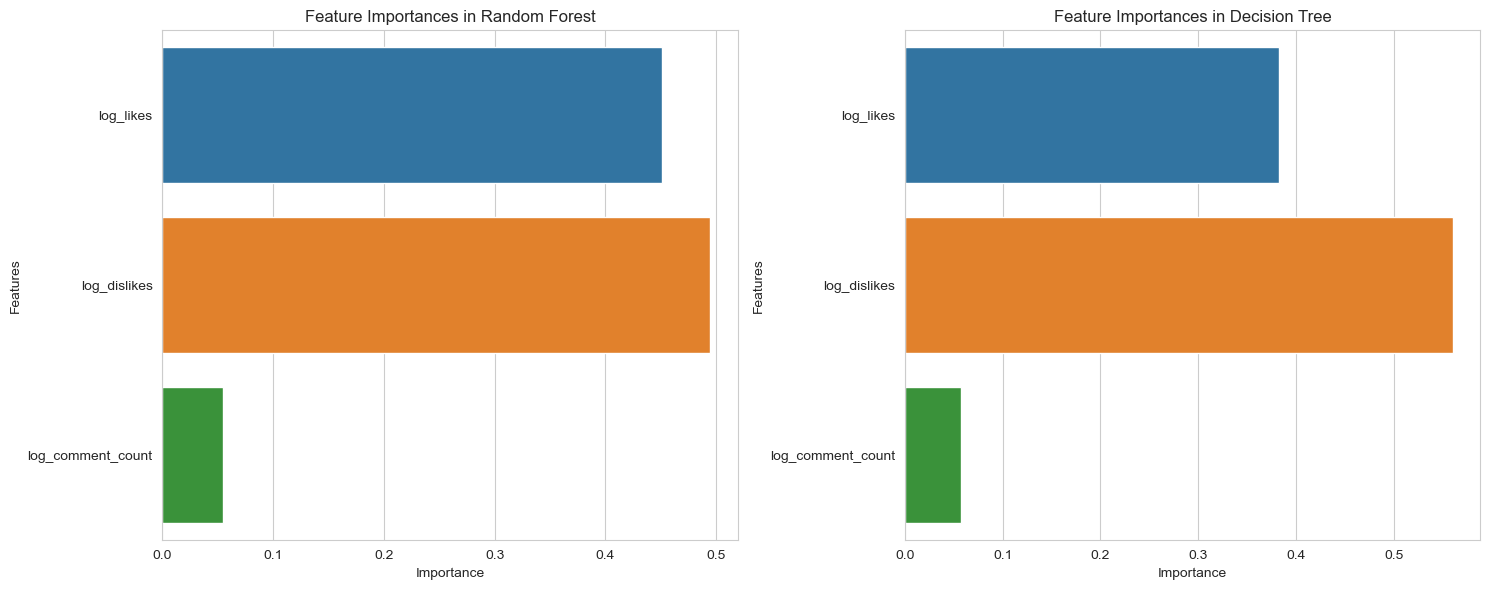

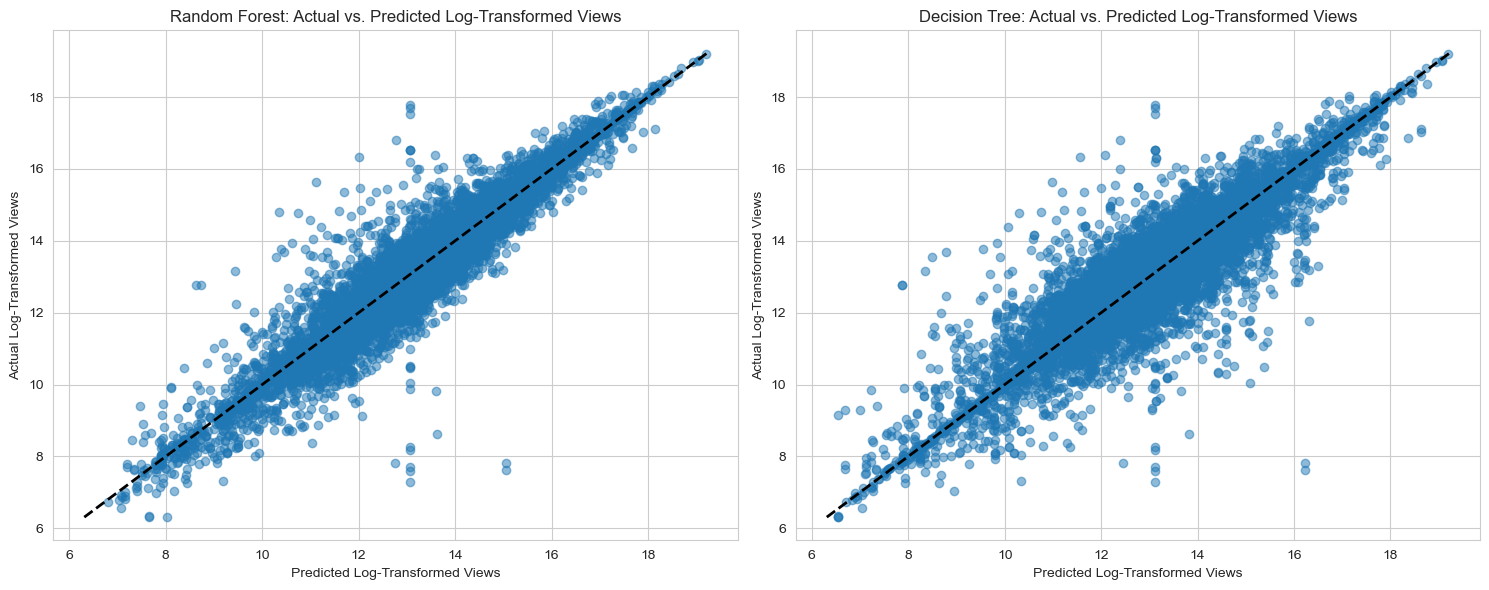

In [54]:
# Plotting Feature Importances for Random Forest and Decision Tree
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Random Forest Feature Importances
sns.barplot(ax=axes[0], x=feature_importances_df['Importance'], y=feature_importances_df['Feature'])
axes[0].set_title('Feature Importances in Random Forest')
axes[0].set_xlabel('Importance')
axes[0].set_ylabel('Features')

# Decision Tree Feature Importances
sns.barplot(ax=axes[1], x=feature_importances_dt_df['Importance'], y=feature_importances_dt_df['Feature'])
axes[1].set_title('Feature Importances in Decision Tree')
axes[1].set_xlabel('Importance')
axes[1].set_ylabel('Features')

plt.tight_layout()
plt.show()

# Plotting Actual vs. Predicted Values for Random Forest and Decision Tree on the test set
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Random Forest Actual vs. Predicted
axes[0].scatter(predicted_log_views_rf, y_test, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
axes[0].set_title('Random Forest: Actual vs. Predicted Log-Transformed Views')
axes[0].set_xlabel('Predicted Log-Transformed Views')
axes[0].set_ylabel('Actual Log-Transformed Views')

# Decision Tree Actual vs. Predicted
axes[1].scatter(predicted_log_views_dt, y_test, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
axes[1].set_title('Decision Tree: Actual vs. Predicted Log-Transformed Views')
axes[1].set_xlabel('Predicted Log-Transformed Views')
axes[1].set_ylabel('Actual Log-Transformed Views')

plt.tight_layout()
plt.show()


# Determine the number of fake videos

In [55]:
# Predicting log-transformed views using the Random Forest model on the entire dataset
predicted_log_views_rf_full = rf_model.predict(X_rf)

# Calculating residuals (difference between actual and predicted log-transformed views) for the entire dataset
residuals_log_rf = np.abs(y_rf - predicted_log_views_rf_full)

# Descriptive statistics of log-transformed residuals to understand their distribution
residuals_log_rf_descriptive_stats = pd.DataFrame(residuals_log_rf).describe()

# Identifying outliers based on log-transformed residuals from the Random Forest model
# Using a common approach of mean + 3*std_dev as the threshold for outliers
residuals_log_rf_threshold = residuals_log_rf_descriptive_stats.loc['mean'] + 3 * residuals_log_rf_descriptive_stats.loc['std']
outlier_log_rf_videos = US_videos[residuals_log_rf > residuals_log_rf_threshold[0]]

# Number of outlier videos identified using log-transformed Random Forest model
num_outlier_log_rf_videos = len(outlier_log_rf_videos)
num_outlier_log_rf_videos


685

In [56]:
US_videos_filtered = US_videos.drop(outlier_log_rf_videos.index)


In [57]:
US_videos_filtered 

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,log_views,log_likes,log_dislikes,log_comment_count
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,13.525659,10.960027,7.995307,9.677528
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",14.698775,11.484382,8.723719,9.449672
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,14.975981,11.891595,8.582981,9.009692
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,12.745978,9.227492,6.502790,7.671827
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,14.555413,11.792343,7.595890,9.771041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,14.337638,10.549569,7.234177,7.885329
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,13.878297,11.002250,5.948035,8.278174
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,13.879848,10.780393,6.940222,8.292298
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,15.549078,12.170228,7.954021,9.479527


In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Preparing the data for the Random Forest model
X_rf = US_videos_filtered[['log_likes', 'log_dislikes', 'log_comment_count']]
y_rf = US_videos_filtered['log_views']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)

# Building the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting log-transformed views on the test set
predicted_log_views_rf = rf_model.predict(X_test)

# Calculating the Root Mean Squared Error (RMSE) for the model
rmse_rf = mean_squared_error(y_test, predicted_log_views_rf, squared=False)

# Getting the feature importances
feature_importances = rf_model.feature_importances_

# Feature names
features = X_rf.columns

# Creating a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

feature_importances_df

,Feature,Importance
0,log_likes,0.373933
1,log_dislikes,0.577024
2,log_comment_count,0.049042


In [59]:
rmse_rf

0.47513823898706803

# Plots for  Different Category

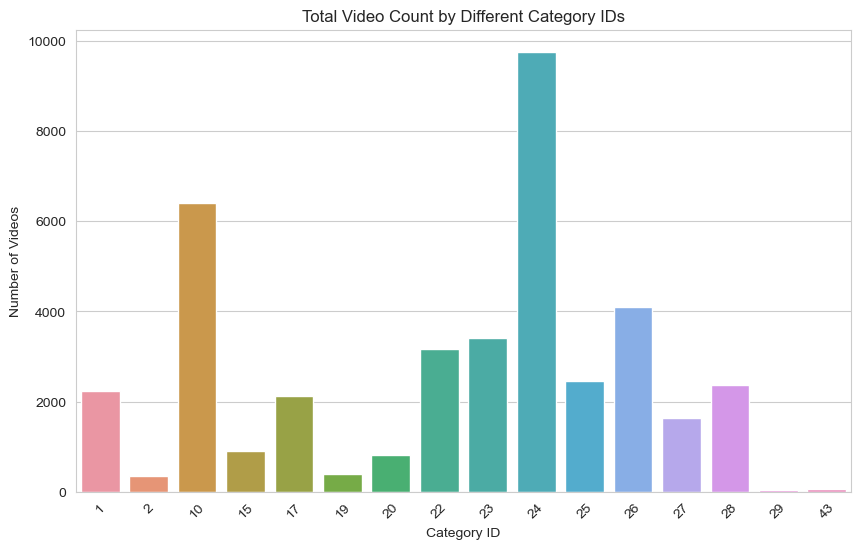

In [60]:
video_count_by_category = US_videos_filtered['category_id'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=video_count_by_category.index, y=video_count_by_category.values)
plt.title('Total Video Count by Different Category IDs')
plt.xlabel('Category ID')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)  # Rotates the category ID labels for better readability
plt.show()



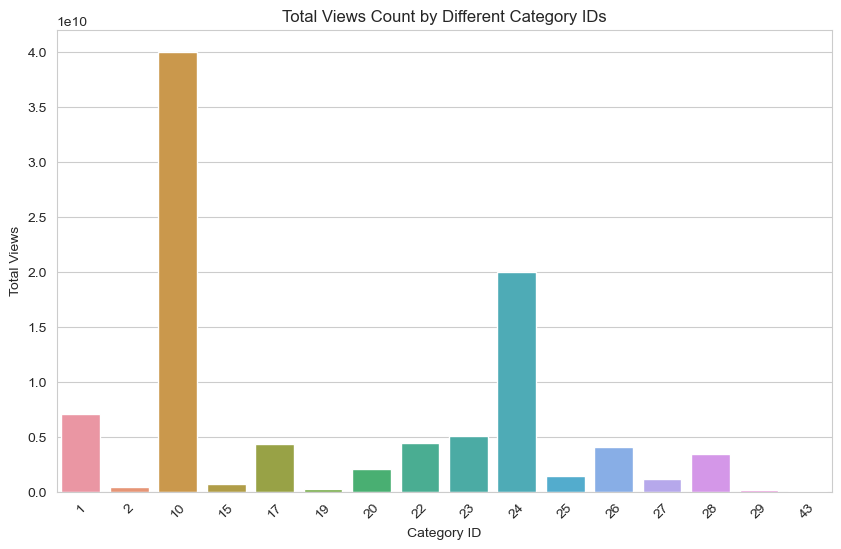

In [61]:
# Aggregate total views by category_id
total_views_by_category = US_videos_filtered.groupby('category_id')['views'].sum()

# Sort the data for better visualization
total_views_by_category = total_views_by_category.sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=total_views_by_category.index, y=total_views_by_category.values)
plt.title('Total Views Count by Different Category IDs')
plt.xlabel('Category ID')
plt.ylabel('Total Views')
plt.xticks(rotation=45)  # Rotates the category ID labels for better readability
plt.show()


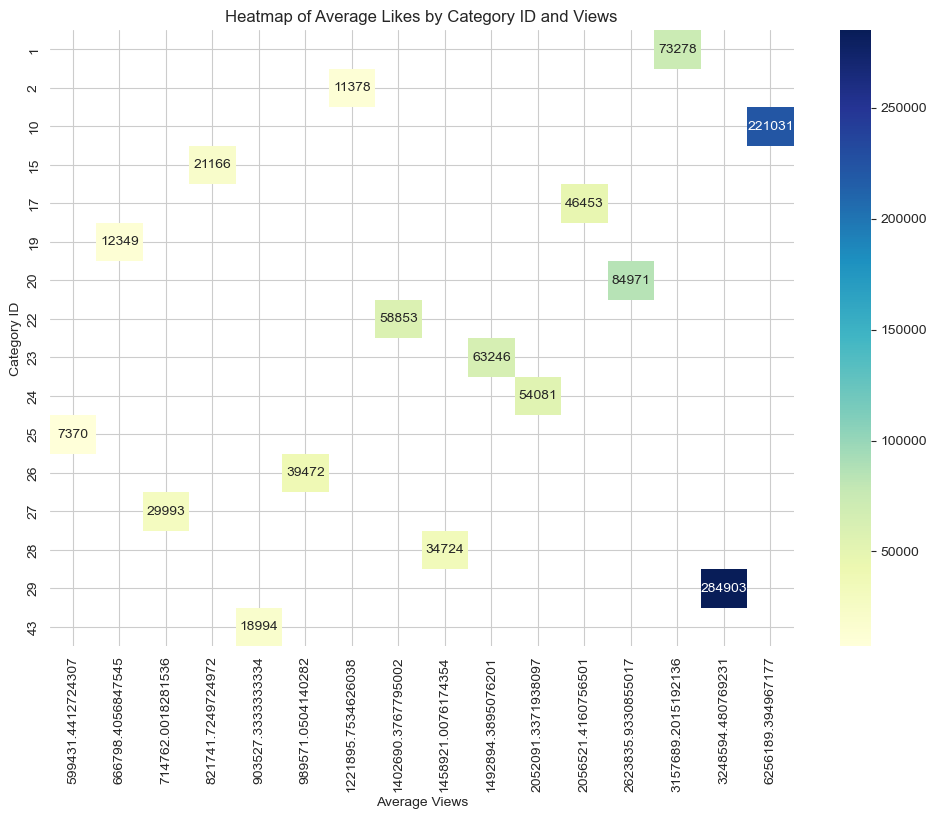

In [62]:
# For an Aggregated Heatmap, we first need to aggregate the data.
# Let's create an aggregated DataFrame with mean views, likes, dislikes, and comment counts for each category

# Aggregating the data
agg_data = US_videos_filtered.groupby('category_id').agg({
    'views': 'mean',
    'likes': 'mean',
    'dislikes': 'mean',
    'comment_count': 'mean'
}).reset_index()

pivot_table = agg_data.pivot(index="category_id", columns="views", values="likes")

# Continue with your plotting code
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heatmap of Average Likes by Category ID and Views")
plt.ylabel("Category ID")
plt.xlabel("Average Views")
plt.show()


# Forecasting(Time Series ARIMA)

In [69]:
def convert_date(date_str):
    year = int(date_str[0:2]) + 2000  # Extracting and converting the year
    day = date_str[3:5]  # Extracting the day
    month = date_str[6:8]  # Extracting the month
    return pd.to_datetime(f"{year}-{month}-{day}")

# Apply the function to the 'trending_date' column
US_videos_filtered['trending_date'] = US_videos_filtered['trending_date'].apply(convert_date).dt.strftime('%Y-%m-%d')

US_videos_filtered['trending_date'].head()  # Displaying the first few converted dates for verification


0    2017-11-14
1    2017-11-14
2    2017-11-14
3    2017-11-14
4    2017-11-14
Name: trending_date, dtype: object

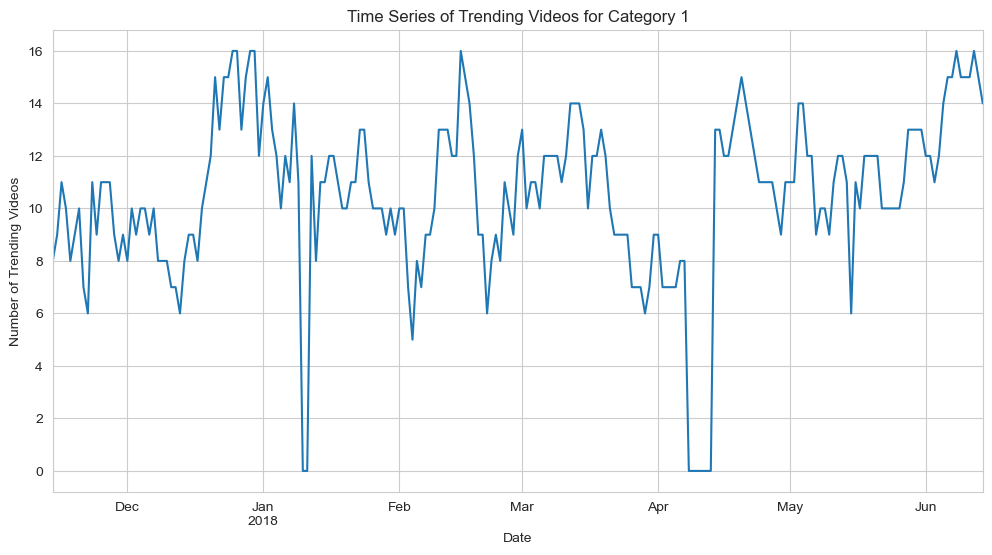

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

# Group by 'trending_date' and count the occurrences
time_series1 = category_1_data.groupby('trending_date').size()

time_series1 = time_series1.reindex(pd.date_range(start=time_series1.index.min(), end=time_series1.index.max(), freq='D'), fill_value=0)

# Visualizing the time series
plt.figure(figsize=(12, 6))
time_series1.plot()
plt.title('Time Series of Trending Videos for Category 1')
plt.xlabel('Date')
plt.ylabel('Number of Trending Videos')
plt.show()

# Additional time series analysis as needed


In [87]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_test = adfuller(time_series1)
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

# Interpret the p-value
if adf_test[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")


ADF Statistic: -5.218437
p-value: 0.000008
Series is stationary


<Figure size 1200x600 with 0 Axes>

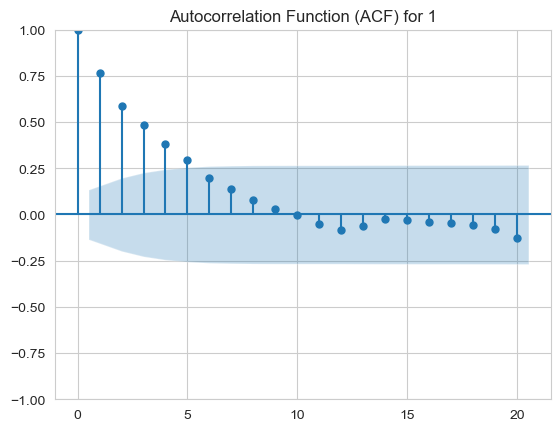

<Figure size 1200x600 with 0 Axes>

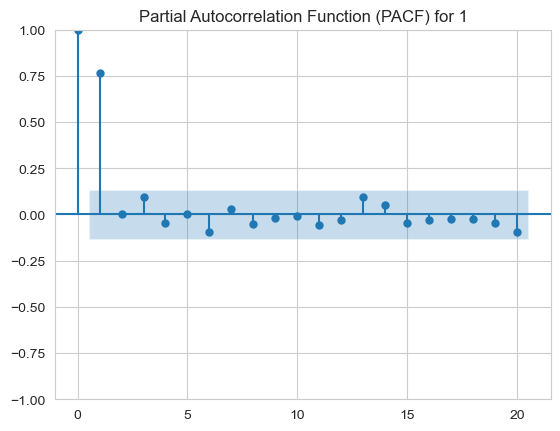

In [88]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(time_series1, lags=20) 
plt.title('Autocorrelation Function (ACF) for 1')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(time_series1, lags=20)  
plt.title('Partial Autocorrelation Function (PACF) for 1')
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  213
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -454.269
Date:                Sun, 07 Jan 2024   AIC                            916.539
Time:                        20:49:51   BIC                            929.984
Sample:                    11-14-2017   HQIC                           921.972
                         - 06-14-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5225      0.743     14.168      0.000       9.067      11.978
ar.L1          0.7715      0.047     16.527      0.000       0.680       0.863
ma.L1         -0.0093      0.080     -0.116      0.9

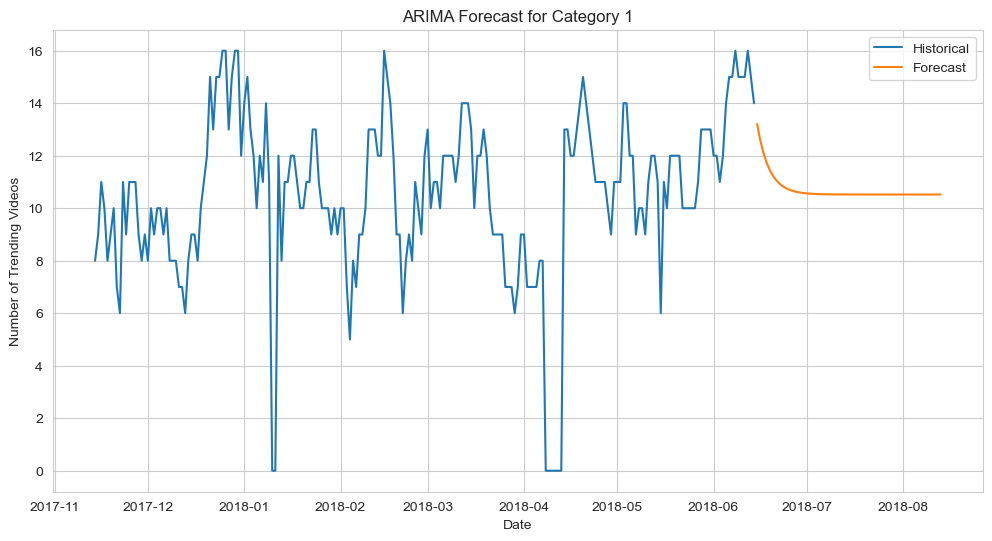

In [90]:
from statsmodels.tsa.arima.model import ARIMA


# Fit the ARIMA model
model = ARIMA(time_series1, order=(1, 0, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Forecast for the next 365 periods
forecast_periods = 60
forecast = model_fit.forecast(steps=forecast_periods)

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series1, label='Historical')
plt.plot(time_series1.index[-1] + pd.to_timedelta(range(1, forecast_periods+1), unit='D'), forecast, label='Forecast')
plt.title('ARIMA Forecast for Category 1')
plt.xlabel('Date')
plt.ylabel('Number of Trending Videos')
plt.legend()
plt.show()


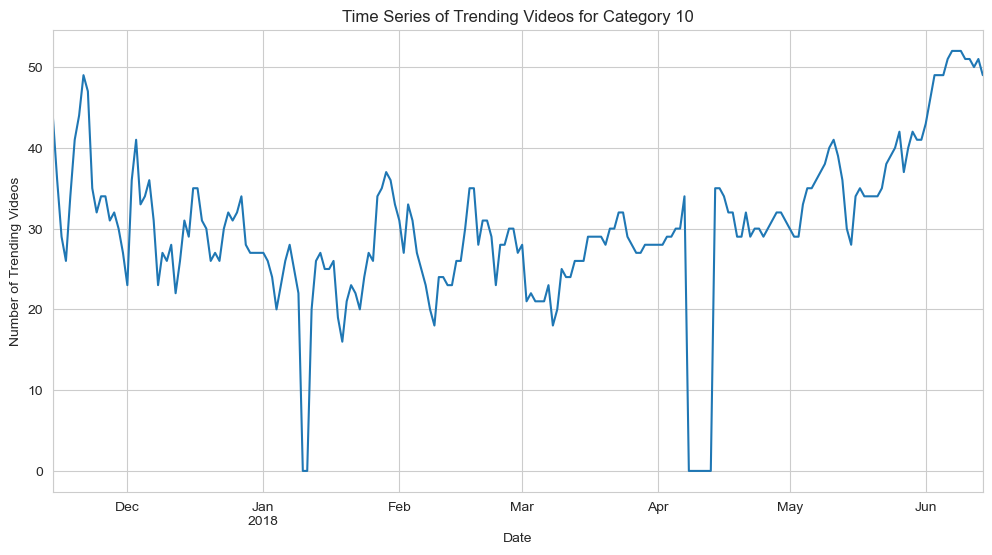

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

# Group by 'trending_date' and count the occurrences
time_series10 = category_10_data.groupby('trending_date').size()

time_series10 = time_series10.reindex(pd.date_range(start=time_series10.index.min(), end=time_series10.index.max(), freq='D'), fill_value=0)

# Visualizing the time series
plt.figure(figsize=(12, 6))
time_series10.plot()
plt.title('Time Series of Trending Videos for Category 10')
plt.xlabel('Date')
plt.ylabel('Number of Trending Videos')
plt.show()

# Additional time series analysis as needed


In [93]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_test = adfuller(time_series10)
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

# Interpret the p-value
if adf_test[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")


ADF Statistic: -2.395692
p-value: 0.142956
Series is not stationary


In [94]:
# Differencing the time series
time_series_diff = time_series10.diff().dropna()

# Check if the differenced series is stationary
adf_test_diff = adfuller(time_series_diff)
print('ADF Statistic (Differenced Series): %f' % adf_test_diff[0])
print('p-value (Differenced Series): %f' % adf_test_diff[1])

# Interpret the p-value
if adf_test_diff[1] > 0.05:
    print("Differenced series is not stationary")
else:
    print("Differenced series is stationary")


ADF Statistic (Differenced Series): -9.649733
p-value (Differenced Series): 0.000000
Differenced series is stationary


<Figure size 1200x600 with 0 Axes>

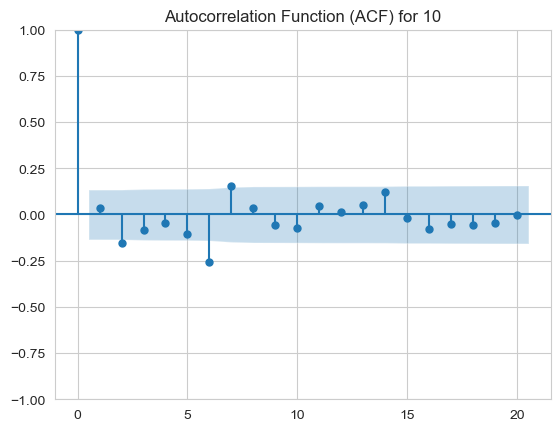

<Figure size 1200x600 with 0 Axes>

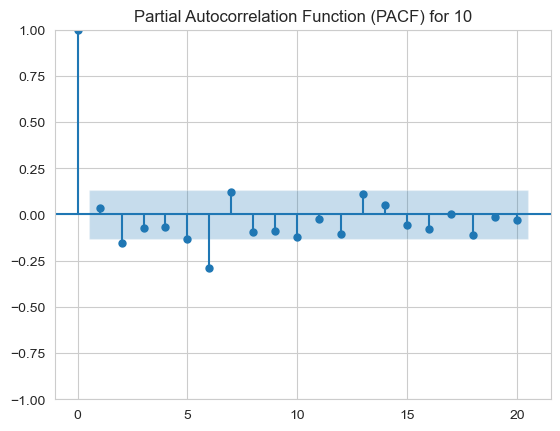

In [95]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(time_series_diff, lags=20) 
plt.title('Autocorrelation Function (ACF) for 10')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(time_series_diff, lags=20)  
plt.title('Partial Autocorrelation Function (PACF) for 10')
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  213
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -636.243
Date:                Sun, 07 Jan 2024   AIC                           1278.486
Time:                        21:46:49   BIC                           1288.556
Sample:                    11-14-2017   HQIC                          1282.556
                         - 06-14-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7685      0.110      7.011      0.000       0.554       0.983
ma.L1         -0.9367      0.065    -14.350      0.000      -1.065      -0.809
sigma2        23.6247      0.919     25.694      0.0

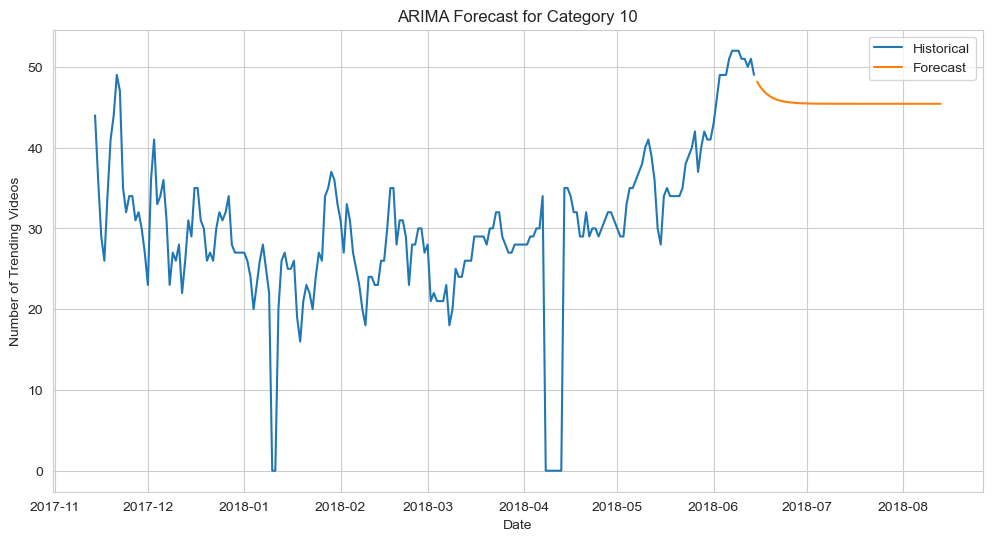

In [96]:
# Fit the ARIMA model
model = ARIMA(time_series10, order=(1, 1, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Forecast for the next 60 periods
forecast_periods = 60
forecast = model_fit.forecast(steps=forecast_periods)

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series10, label='Historical')
plt.plot(time_series10.index[-1] + pd.to_timedelta(range(1, forecast_periods+1), unit='D'), forecast, label='Forecast')
plt.title('ARIMA Forecast for Category 10')
plt.xlabel('Date')
plt.ylabel('Number of Trending Videos')
plt.legend()
plt.show()


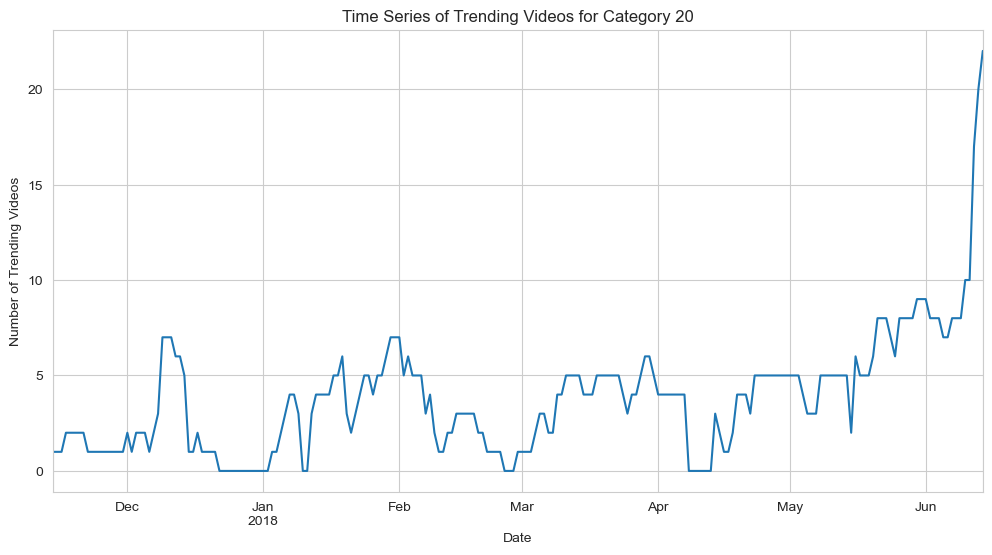

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

# Group by 'trending_date' and count the occurrences
time_series20 = category_20_data.groupby('trending_date').size()

time_series20 = time_series20.reindex(pd.date_range(start=time_series20.index.min(), end=time_series20.index.max(), freq='D'), fill_value=0)

# Visualizing the time series
plt.figure(figsize=(12, 6))
time_series20.plot()
plt.title('Time Series of Trending Videos for Category 20')
plt.xlabel('Date')
plt.ylabel('Number of Trending Videos')
plt.show()

# Additional time series analysis as needed



In [102]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_test = adfuller(time_series20)
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

# Interpret the p-value
if adf_test[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

ADF Statistic: 0.532850
p-value: 0.985838
Series is not stationary


<Figure size 1200x600 with 0 Axes>

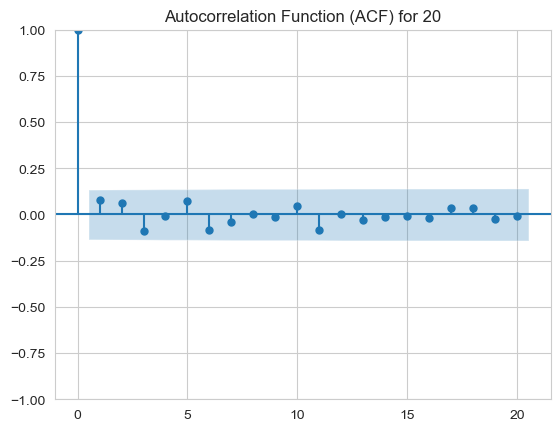

<Figure size 1200x600 with 0 Axes>

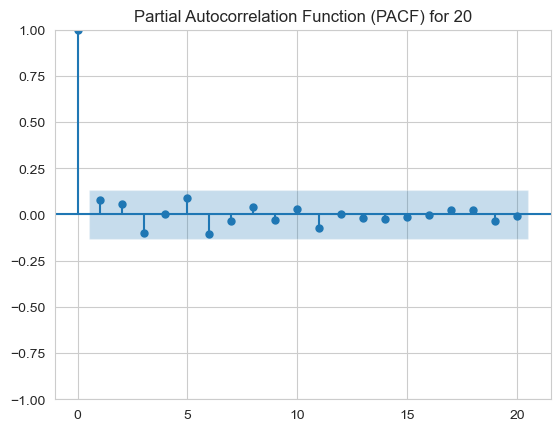

In [104]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(time_series_diff, lags=20) 
plt.title('Autocorrelation Function (ACF) for 20')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(time_series_diff, lags=20)  
plt.title('Partial Autocorrelation Function (PACF) for 20')
plt.show()

In [103]:
# Differencing the time series
time_series_diff = time_series20.diff().dropna()

# Check if the differenced series is stationary
adf_test_diff = adfuller(time_series_diff)
print('ADF Statistic (Differenced Series): %f' % adf_test_diff[0])
print('p-value (Differenced Series): %f' % adf_test_diff[1])

# Interpret the p-value
if adf_test_diff[1] > 0.05:
    print("Differenced series is not stationary")
else:
    print("Differenced series is stationary")


ADF Statistic (Differenced Series): -13.283599
p-value (Differenced Series): 0.000000
Differenced series is stationary


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  213
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -328.294
Date:                Sun, 07 Jan 2024   AIC                            662.589
Time:                        22:06:49   BIC                            672.659
Sample:                    11-14-2017   HQIC                           666.659
                         - 06-14-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3210      0.691      0.465      0.642      -1.032       1.674
ma.L1         -0.2339      0.705     -0.332      0.740      -1.616       1.148
sigma2         1.2959      0.061     21.203      0.0

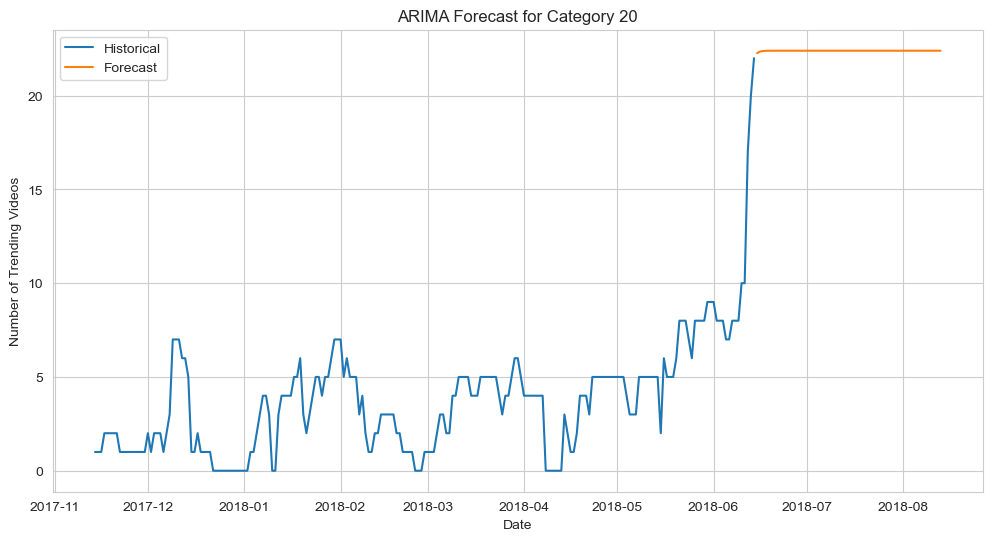

In [106]:
# Fit the ARIMA model
model = ARIMA(time_series20, order=(1, 1, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Forecast for the next 60 periods
forecast_periods = 60
forecast = model_fit.forecast(steps=forecast_periods)

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series20, label='Historical')
plt.plot(time_series20.index[-1] + pd.to_timedelta(range(1, forecast_periods+1), unit='D'), forecast, label='Forecast')
plt.title('ARIMA Forecast for Category 20')
plt.xlabel('Date')
plt.ylabel('Number of Trending Videos')
plt.legend()
plt.show()


# Forecasting(LSTM)

In [77]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Convert the date to a datetime object (if not already done)
US_videos_filtered.index = pd.to_datetime(US_videos_filtered.index)

# Proceed with resampling if 'trending_date' is already the index
daily_trend_count = US_videos_filtered.resample('D').size()


# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_counts = scaler.fit_transform(daily_trend_count.values.reshape(-1, 1))

# Create sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 30  # Number of days to use for prediction
X, y = create_sequences(scaled_counts, sequence_length)

# Split into training and testing sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Forecasting
predicted_counts = model.predict(X_test)

# Invert normalization
predicted_counts = scaler.inverse_transform(predicted_counts)
real_counts = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
rmse = np.sqrt(mean_squared_error(real_counts, predicted_counts))


Epoch 1/100
5/5 [==============================] - 4s 29ms/step - loss: 0.6022
Epoch 2/100
5/5 [==============================] - 0s 29ms/step - loss: 0.1396
Epoch 3/100
5/5 [==============================] - 0s 28ms/step - loss: 0.1113
Epoch 4/100
5/5 [==============================] - 0s 32ms/step - loss: 0.0815
Epoch 5/100
5/5 [==============================] - 0s 32ms/step - loss: 0.0871
Epoch 6/100
5/5 [==============================] - 0s 34ms/step - loss: 0.0655
Epoch 7/100
5/5 [==============================] - 0s 33ms/step - loss: 0.0694
Epoch 8/100
5/5 [==============================] - 0s 39ms/step - loss: 0.0645
Epoch 9/100
5/5 [==============================] - 0s 37ms/step - loss: 0.0666
Epoch 10/100
5/5 [==============================] - 0s 34ms/step - loss: 0.0631
Epoch 11/100
5/5 [==============================] - 0s 33ms/step - loss: 0.0623
Epoch 12/100
5/5 [==============================] - 0s 36ms/step - loss: 0.0685
Epoch 13/100
5/5 [==============================]

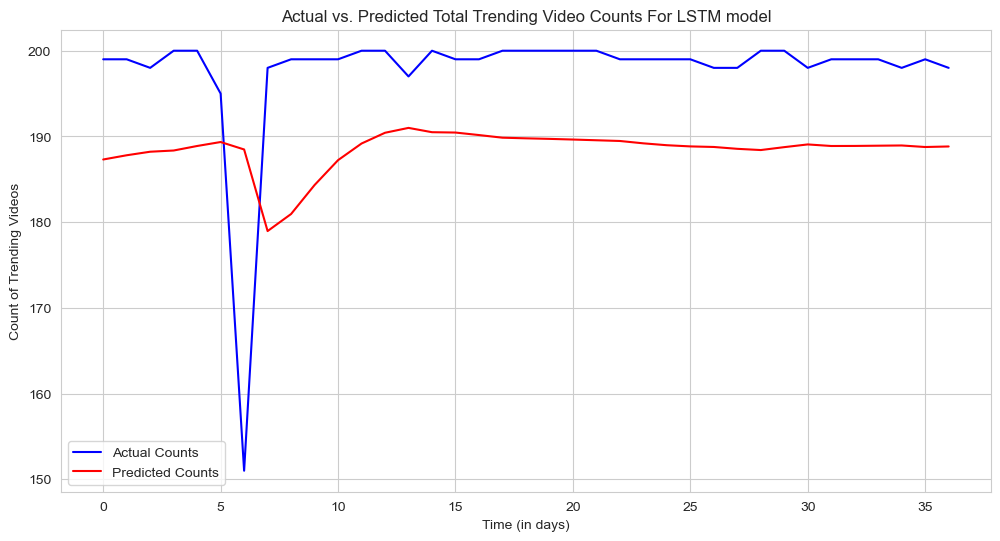

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(real_counts, label='Actual Counts', color='blue')
plt.plot(predicted_counts, label='Predicted Counts', color='red')
plt.title('Actual vs. Predicted Total Trending Video Counts For LSTM model')
plt.xlabel('Time (in days)')
plt.ylabel('Count of Trending Videos')
plt.legend()
plt.show()


1/1 [==============================] - 0s 25ms/step


/var/folders/hk/ggy3l8zx26z102ghbrv42j9w0000gn/T/ipykernel_13975/2905141992.py:30: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=last_date, periods=num_periods_to_predict+1, closed='right')


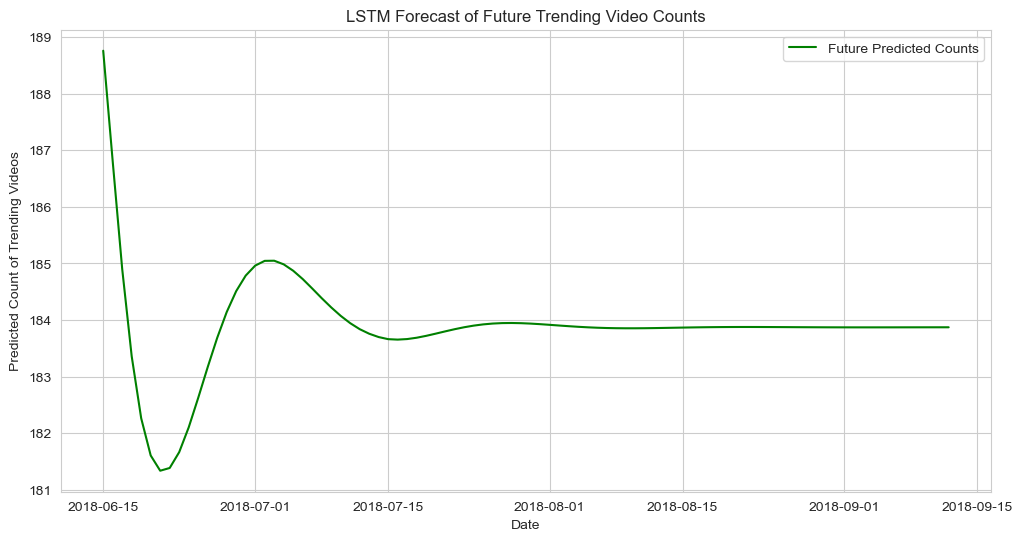

In [79]:

num_periods_to_predict = 90

# The last known data point
last_known_sequence = scaled_counts[-sequence_length:]

# Store future predictions
future_predictions = []

# Predict into the future
current_sequence = last_known_sequence
for _ in range(num_periods_to_predict):
    # Reshape the sequence to match the model's input shape
    current_sequence_reshaped = current_sequence.reshape((1, sequence_length, 1))
    
    # Get the next prediction
    next_prediction = model.predict(current_sequence_reshaped)
    
    # Append the prediction
    future_predictions.append(next_prediction.ravel()[0])
    
    # Update the sequence to include the new prediction
    current_sequence = np.append(current_sequence[1:], next_prediction)

# Invert normalization on future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a date range for future predictions
last_date = US_videos_filtered.index[-1]
future_dates = pd.date_range(start=last_date, periods=num_periods_to_predict+1, closed='right')

# Plot future predictions
plt.figure(figsize=(12, 6))
plt.plot(future_dates, future_predictions, label='Future Predicted Counts', color='green')
plt.title('LSTM Forecast of Future Trending Video Counts')
plt.xlabel('Date')
plt.ylabel('Predicted Count of Trending Videos')
plt.legend()
plt.show()


1/1 [==============================] - 0s 32ms/step


/var/folders/hk/ggy3l8zx26z102ghbrv42j9w0000gn/T/ipykernel_13975/1216587720.py:41: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates_category_1 = pd.date_range(start=last_date_category_1, periods=num_periods_to_predict+1, closed='right')


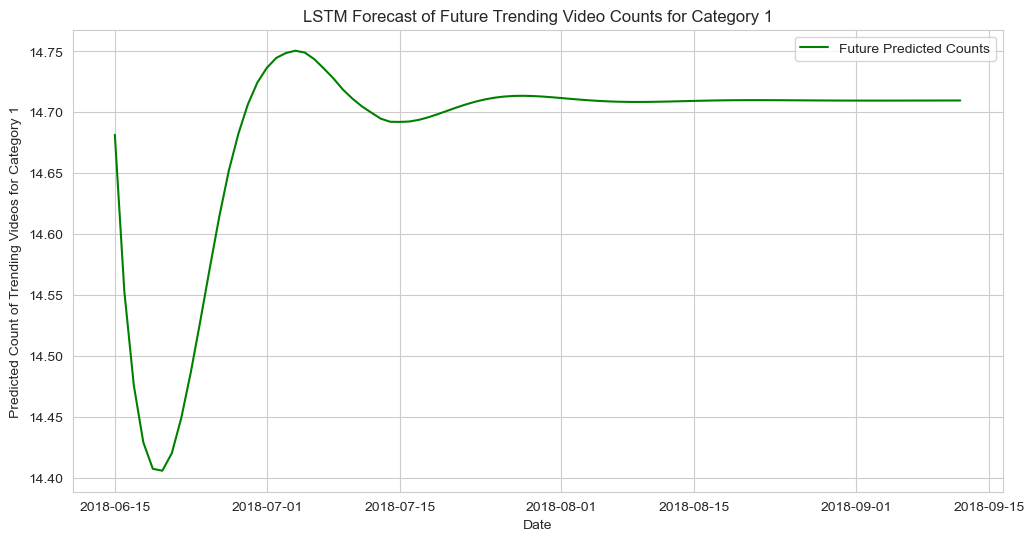

In [81]:


daily_trend_count_category_1 = category_1_data.resample('D').size()


# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_counts_category_1 = scaler.fit_transform(daily_trend_count_category_1.values.reshape(-1, 1))

# Create sequences, split the data, build and train the LSTM model
# ... (The rest of the LSTM modeling steps would be here, similar to the previous example)

# After training the model, you predict future counts for category 1 as follows:

# The last known data point for category 1
last_known_sequence_category_1 = scaled_counts_category_1[-sequence_length:]

# Store future predictions for category 1
future_predictions_category_1 = []

# Predict into the future for category 1
current_sequence_category_1 = last_known_sequence_category_1
for _ in range(num_periods_to_predict):
    # Reshape the sequence to match the model's input shape
    current_sequence_reshaped = current_sequence_category_1.reshape((1, sequence_length, 1))
    
    # Get the next prediction
    next_prediction = model.predict(current_sequence_reshaped)
    
    # Append the prediction
    future_predictions_category_1.append(next_prediction.ravel()[0])
    
    # Update the sequence to include the new prediction
    current_sequence_category_1 = np.append(current_sequence_category_1[1:], next_prediction)

# Invert normalization on future predictions for category 1
future_predictions_category_1 = scaler.inverse_transform(np.array(future_predictions_category_1).reshape(-1, 1))

# Create a date range for future predictions for category 1
last_date_category_1 = category_1_data.index[-1]
future_dates_category_1 = pd.date_range(start=last_date_category_1, periods=num_periods_to_predict+1, closed='right')

# Plot future predictions for category 1
plt.figure(figsize=(12, 6))
plt.plot(future_dates_category_1, future_predictions_category_1, label='Future Predicted Counts', color='green')
plt.title('LSTM Forecast of Future Trending Video Counts for Category 1')
plt.xlabel('Date')
plt.ylabel('Predicted Count of Trending Videos for Category 1')
plt.legend()
plt.show()


1/1 [==============================] - 0s 32ms/step


/var/folders/hk/ggy3l8zx26z102ghbrv42j9w0000gn/T/ipykernel_13975/3885103925.py:42: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates_category_10 = pd.date_range(start=last_date_category_10, periods=num_periods_to_predict+1, closed='right')


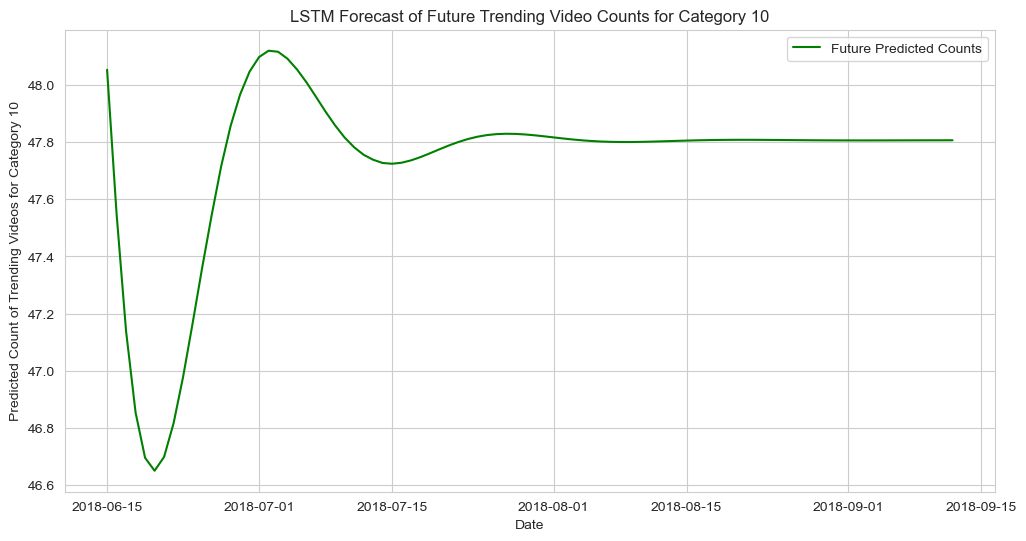

0

In [84]:
category_10_data = US_videos_filtered[US_videos_filtered['category_id'] == 10]


daily_trend_count_category_10 = category_10_data.resample('D').size()


# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_counts_category_10 = scaler.fit_transform(daily_trend_count_category_10.values.reshape(-1, 1))

# Create sequences, split the data, build and train the LSTM model
# ... (The rest of the LSTM modeling steps would be here, similar to the previous example)

# After training the model, you predict future counts for category 1 as follows:

# The last known data point for category 1
last_known_sequence_category_10 = scaled_counts_category_10[-sequence_length:]

# Store future predictions for category 1
future_predictions_category_10 = []

# Predict into the future for category 1
current_sequence_category_10 = last_known_sequence_category_10
for _ in range(num_periods_to_predict):
    # Reshape the sequence to match the model's input shape
    current_sequence_reshaped = current_sequence_category_10.reshape((1, sequence_length, 1))
    
    # Get the next prediction
    next_prediction = model.predict(current_sequence_reshaped)
    
    # Append the prediction
    future_predictions_category_10.append(next_prediction.ravel()[0])
    
    # Update the sequence to include the new prediction
    current_sequence_category_10 = np.append(current_sequence_category_10[1:], next_prediction)

# Invert normalization on future predictions for category 1
future_predictions_category_10 = scaler.inverse_transform(np.array(future_predictions_category_10).reshape(-1, 1))

# Create a date range for future predictions for category 1
last_date_category_10 = category_10_data.index[-1]
future_dates_category_10 = pd.date_range(start=last_date_category_10, periods=num_periods_to_predict+1, closed='right')

# Plot future predictions for category 1
plt.figure(figsize=(12, 6))
plt.plot(future_dates_category_10, future_predictions_category_10, label='Future Predicted Counts', color='green')
plt.title('LSTM Forecast of Future Trending Video Counts for Category 10')
plt.xlabel('Date')
plt.ylabel('Predicted Count of Trending Videos for Category 10')
plt.legend()
plt.show()
0

1/1 [==============================] - 0s 30ms/step


/var/folders/hk/ggy3l8zx26z102ghbrv42j9w0000gn/T/ipykernel_13975/32421076.py:42: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates_category_20 = pd.date_range(start=last_date_category_20, periods=num_periods_to_predict+1, closed='right')


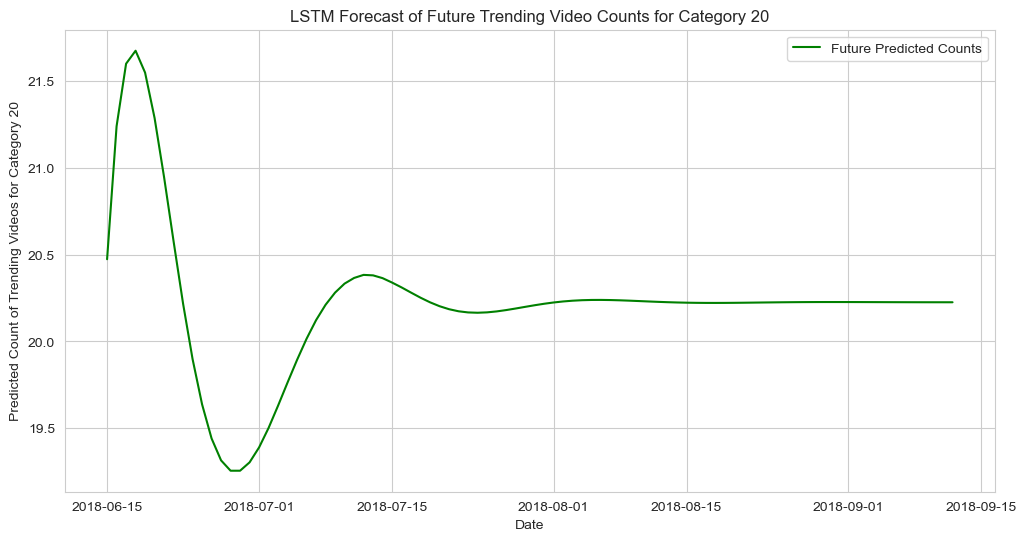

0

In [85]:
category_20_data = US_videos_filtered[US_videos_filtered['category_id'] == 20]


daily_trend_count_category_20 = category_20_data.resample('D').size()


# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_counts_category_20 = scaler.fit_transform(daily_trend_count_category_20.values.reshape(-1, 1))

# Create sequences, split the data, build and train the LSTM model
# ... (The rest of the LSTM modeling steps would be here, similar to the previous example)

# After training the model, you predict future counts for category 1 as follows:

# The last known data point for category 1
last_known_sequence_category_20 = scaled_counts_category_20[-sequence_length:]

# Store future predictions for category 1
future_predictions_category_20 = []

# Predict into the future for category 1
current_sequence_category_20 = last_known_sequence_category_20
for _ in range(num_periods_to_predict):
    # Reshape the sequence to match the model's input shape
    current_sequence_reshaped = current_sequence_category_20.reshape((1, sequence_length, 1))
    
    # Get the next prediction
    next_prediction = model.predict(current_sequence_reshaped)
    
    # Append the prediction
    future_predictions_category_20.append(next_prediction.ravel()[0])
    
    # Update the sequence to include the new prediction
    current_sequence_category_20 = np.append(current_sequence_category_20[1:], next_prediction)

# Invert normalization on future predictions for category 1
future_predictions_category_20 = scaler.inverse_transform(np.array(future_predictions_category_20).reshape(-1, 1))

# Create a date range for future predictions for category 1
last_date_category_20 = category_20_data.index[-1]
future_dates_category_20 = pd.date_range(start=last_date_category_20, periods=num_periods_to_predict+1, closed='right')

# Plot future predictions for category 1
plt.figure(figsize=(12, 6))
plt.plot(future_dates_category_20, future_predictions_category_20, label='Future Predicted Counts', color='green')
plt.title('LSTM Forecast of Future Trending Video Counts for Category 20')
plt.xlabel('Date')
plt.ylabel('Predicted Count of Trending Videos for Category 20')
plt.legend()
plt.show()
0